<a href="https://colab.research.google.com/github/MukRodrigues/Projetos-Python/blob/main/Exemplos_Equacoes_Sturm_Liouville.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from scipy.integrate import odeint
import numpy as np
from numpy import sin, cos, exp, sqrt,pi, linspace
import matplotlib.pyplot as plt

'''
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint
 https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp
Video aula de odeint: https://www.youtube.com/watch?v=-Y2KHuVplMI
'''

'\nDocumentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint\n https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp\nVideo aula de odeint: https://www.youtube.com/watch?v=-Y2KHuVplMI\n'

# Equações de Sturm-Liouville



São equações do tipo

$$
(p(x)y')' + (\lambda\rho(x) - q(x))y(x) = 0
$$
onde $p>0$, $\rho, q$ são funções contínuas.

## Exemplo 1:

$$
\begin{cases}
y'' + \lambda y = 0, \quad x \in [a,b] \\
\\
y(x_0) = y_0, \ y'(x_0) = y_1
\end{cases}
$$

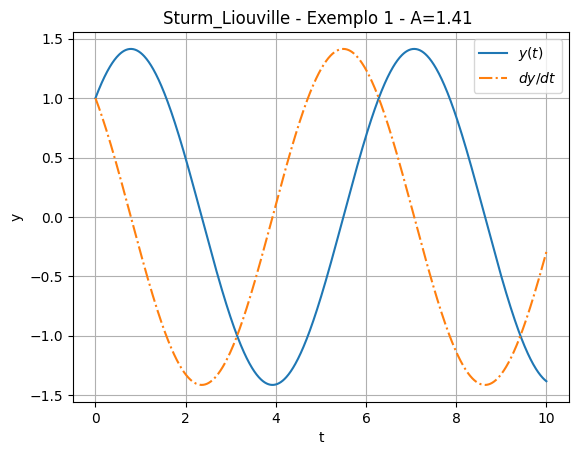

In [70]:
x = np.linspace(0,10,1000)
ci = [1, 1]
Lambda = 1
def SL_exe1(z,x,Lambda):
  y, dydt = z
  dy2dt2 = - Lambda * y
  return [dydt, dy2dt2]

solution = odeint(SL_exe1,ci,x, args=(Lambda,))
sg = ci[0]*cos(sqrt(Lambda) *x  ) + ci[1]/sqrt(Lambda) *sin(sqrt(Lambda) *x  )
sg_dif = -sqrt(Lambda) *ci[0]*sin(sqrt(Lambda) *x  ) + ci[1]*cos(sqrt(Lambda) *x  )
A = sqrt( ci[0]**2 + (ci[1]**2 /Lambda )   )  #amplitude de onda
plt.plot(x, solution[:,0], label='$y(t)$')
plt.plot(x, solution[:,1],'-.', label='$dy/dt$')
#plt.plot(x, sg,'--',color='r', label='$sol_geral$')
#plt.plot(x, sg_dif,'--',color='b', label='$sol_dif$')

plt.title(f'Sturm_Liouville - Exemplo 1 - A={round(A,2)} ')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()


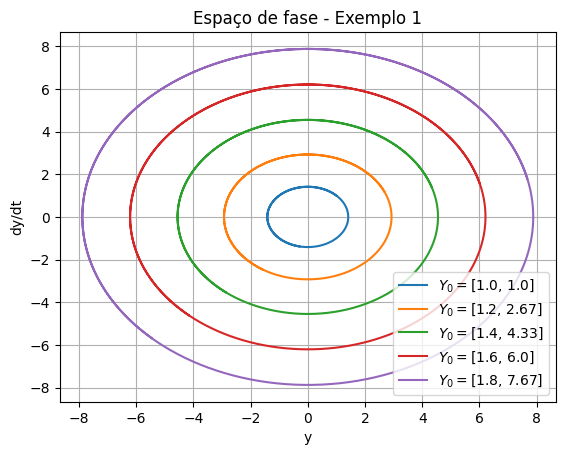

In [71]:
x = np.linspace(0,10,1000)
L = [[round(1 + i/5,2), round(1 + 5*i/3,2)] for i in range(5) ]

Lambda = 1
def SL_exe1(z,x,Lambda):
  y, dydt = z
  dy2dt2 = - Lambda * y
  return [dydt, dy2dt2]

for i in L:
  solution = odeint(SL_exe1,i,x, args=(Lambda,))
  plt.plot(solution[:,1], solution[:,0], label=f'$Y_0=${i}')

plt.title(f'Espaço de fase - Exemplo 1')
plt.legend()
plt.xlabel('y')
plt.ylabel('dy/dt')
plt.grid()
plt.show()

Analisar a interferência do parãmetro lambda na equação.

<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:16: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:16: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-2787654760.py:13: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(x, solution[:,0], label=f'$\lambda=${i}')
/tmp/ipython-input-2787654760.py:16: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Solução geral de $y\'\'(t) + \lambda y(t) = 0$')


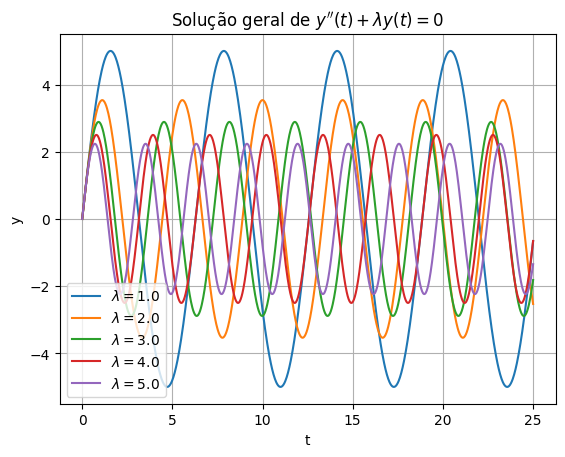

In [72]:
x = np.linspace(0,25,1000)
ci = [0, 5]
Lambda = np.linspace(1,5,5)   #lambda altera a amplitude de onda e a frequencia de oscilação... quanto menor, maior a amplitude... quanto maior, maior a frequencia
# lambda = proporcional a prop. frequencia e inv. prop.  a amplitude, ou seja lamda = gama * f / A

def SL_exe1(z,x,Lambda):
  y, dydt = z
  dy2dt2 = - Lambda * y
  return [dydt, dy2dt2]

for i in Lambda:
  solution = odeint(SL_exe1,ci,x, args=(i,))
  plt.plot(x, solution[:,0], label=f'$\lambda=${i}')

#plt.plot(x, solution[:,1],'-.', label='$dy/dt$')
plt.title('Solução geral de $y\'\'(t) + \lambda y(t) = 0$')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()


<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-4054248841.py:13: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(x, solution[:,1], label=f'$\lambda=${i}')


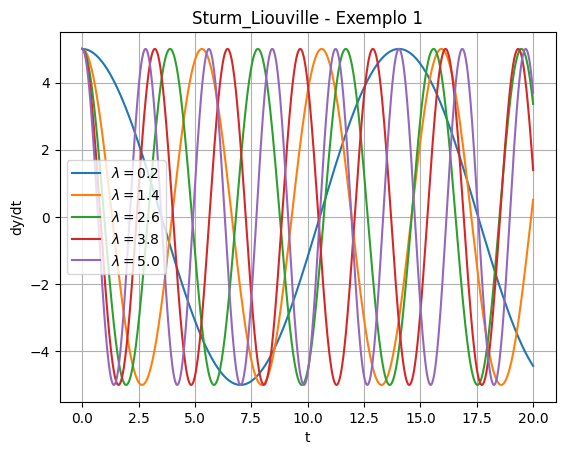

In [73]:
x = np.linspace(0,20,1000)
ci = [0, 5]
Lambda = np.linspace(.2,5,5)   #lambda altera a amplitude de onda e a frequencia de oscilação... quanto menor, maior a amplitude... quanto maior, maior a frequencia
# lambda = proporcional a prop. frequencia e inv. prop.  a amplitude, ou seja lamda = gama * f / A

def SL_exe1(z,x,Lambda):
  y, dydt = z
  dy2dt2 = - Lambda * y
  return [dydt, dy2dt2]

for i in Lambda:
  solution = odeint(SL_exe1,ci,x, args=(i,))
  plt.plot(x, solution[:,1], label=f'$\lambda=${i}')

#plt.plot(x, solution[:,1],'-.', label='$dy/dt$')
plt.title('Sturm_Liouville - Exemplo 1')
plt.legend()
plt.xlabel('t')
plt.ylabel('dy/dt')
plt.grid()
plt.show()


## Exemplo 2:

$$
\begin{cases}
y'' + \lambda \rho(x) y = 0, \quad x \in [a,b] \\
\\
y(x_0) = y_0, \ y'(x_0) = y_1
\end{cases}
$$

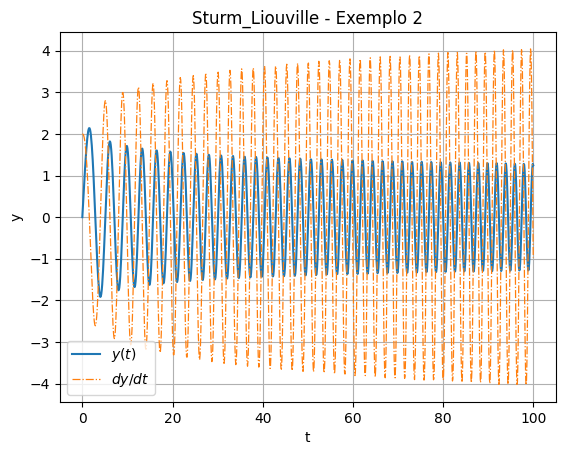

In [74]:
x = np.linspace(0,100,1000)
ci = [0, 2]

Lambda = 1
def SL_exe2(z,x,Lambda):
  rho = np.sqrt(x)
  y, dydt = z
  dy2dt2 = - Lambda * rho *y
  return [dydt, dy2dt2]

solution = odeint(SL_exe2,ci,x, args=(Lambda,))

plt.plot(x, solution[:,0], label='$y(t)$')
plt.plot(x, solution[:,1],'-.',linewidth=0.9, label='$dy/dt$')
plt.title('Sturm_Liouville - Exemplo 2')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()


Analisar a interferência do parãmetro lambda na equação.

<>:14: SyntaxWarning: invalid escape sequence '\l'
<>:14: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-3216542407.py:14: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(x, solution[:,0], label=f'$\lambda=${i}')


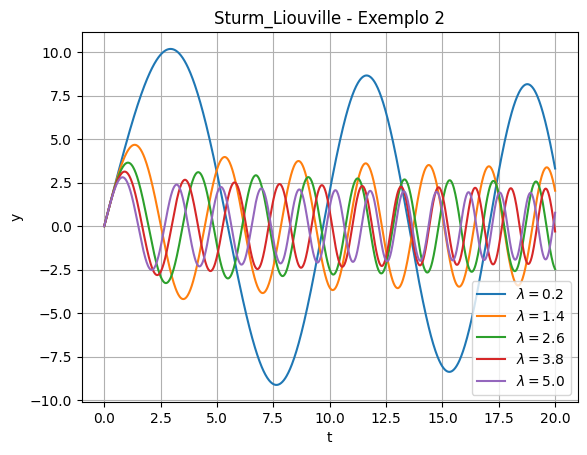

In [75]:
x = np.linspace(0,20,1000)
ci = [0, 5]
Lambda = np.linspace(.2,5,5)   #lambda altera a amplitude de onda e a frequencia de oscilação... quanto menor, maior a amplitude... quanto maior, maior a frequencia
# lambda = proporcional a prop. frequencia e inv. prop.  a amplitude, ou seja lamda = gama * f / A

def SL_exe2(z,x,Lambda):
  rho = np.sqrt(x)
  y, dydt = z
  dy2dt2 = - Lambda * rho *y
  return [dydt, dy2dt2]

for i in Lambda:
  solution = odeint(SL_exe2,ci,x, args=(i,))
  plt.plot(x, solution[:,0], label=f'$\lambda=${i}')

#plt.plot(x, solution[:,1],'-.', label='$dy/dt$')
plt.title('Sturm_Liouville - Exemplo 2')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()


<>:14: SyntaxWarning: invalid escape sequence '\l'
<>:14: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-2935591164.py:14: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(x, solution[:,1], label=f'$\lambda=${i}')


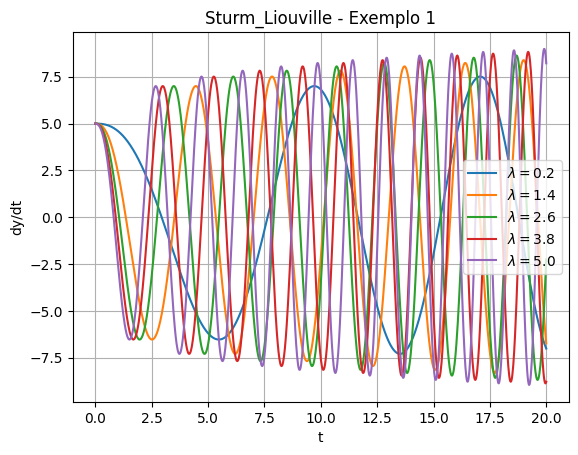

In [76]:
x = np.linspace(0,20,1000)
ci = [0, 5]
Lambda = np.linspace(.2,5,5)   #lambda altera a amplitude de onda e a frequencia de oscilação... quanto menor, maior a amplitude... quanto maior, maior a frequencia
# lambda = proporcional a prop. frequencia e inv. prop.  a amplitude, ou seja lamda = gama * f / A

def SL_exe2(z,x,Lambda):
  rho = np.sqrt(x)
  y, dydt = z
  dy2dt2 = - Lambda * rho *y
  return [dydt, dy2dt2]

for i in Lambda:
  solution = odeint(SL_exe2,ci,x, args=(i,))
  plt.plot(x, solution[:,1], label=f'$\lambda=${i}')

#plt.plot(x, solution[:,1],'-.', label='$dy/dt$')
plt.title('Sturm_Liouville - Exemplo 1')
plt.legend()
plt.xlabel('t')
plt.ylabel('dy/dt')
plt.grid()
plt.show()


## Exemplo 3:

$$
\begin{cases}
y'' + (\lambda \rho(x) -q(x))y = 0, \quad x \in [a,b] \\
\\
y(x_0) = y_0, \ y'(x_0) = y_1
\end{cases}
$$

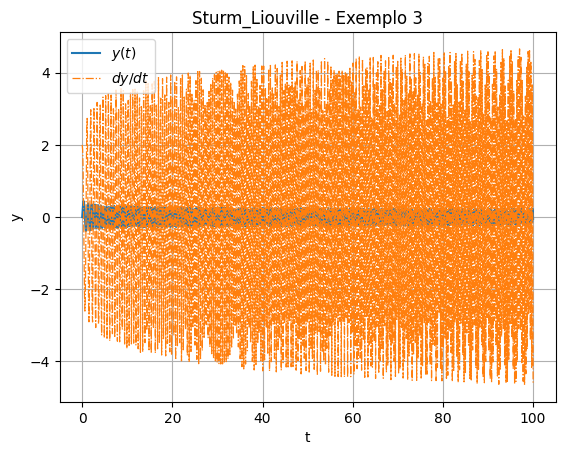

In [77]:
x = np.linspace(0,100,1000)
ci = [0, 2]

Lambda = 50
def SL_exe2(z,x,Lambda):
  rho = np.sqrt(x)
  q = x
  y, dydt = z
  dy2dt2 = (q - Lambda * rho) *y
  return [dydt, dy2dt2]

solution = odeint(SL_exe2,ci,x, args=(Lambda,))

plt.plot(x, solution[:,0], label='$y(t)$')
plt.plot(x, solution[:,1],'-.',linewidth=0.9, label='$dy/dt$')
plt.title('Sturm_Liouville - Exemplo 3')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()


## Exemplo 4:

$$
\begin{cases}
(p(x)y')' + (\lambda\rho(x) - q(x))y(x) = 0, \quad x \in [a,b] \\
\\
y(x_0) = y_0, \ y'(x_0) = y_1
\end{cases}
$$

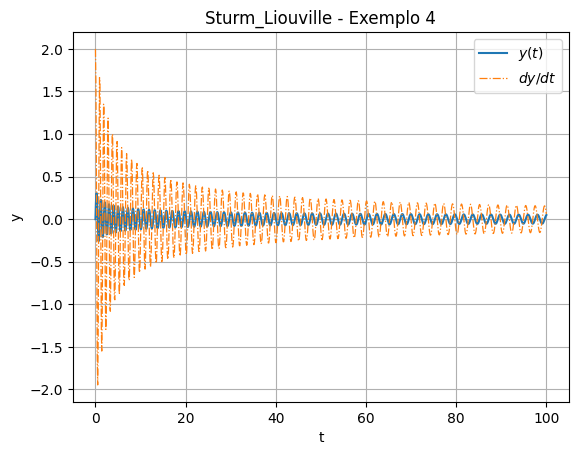

In [78]:
x = np.linspace(0,100,1000)
ci = [0, 2]

Lambda = 100
def SL_exe2(z,x,Lambda):
  p = x+1
  rho = np.sqrt(x)
  q = x
  y, dydt = z
  dy2dt2 = -1/(x+1) *dydt + (q - Lambda * rho)/(x+1) *y
  return [dydt, dy2dt2]

solution = odeint(SL_exe2,ci,x, args=(Lambda,))

plt.plot(x, solution[:,0], label='$y(t)$')
plt.plot(x, solution[:,1],'-.',linewidth=0.9, label='$dy/dt$')
plt.title('Sturm_Liouville - Exemplo 4')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()
